In [2]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as SK_LogisticRegression


# Custom imports
from LogisticRegression import LogisticRegression

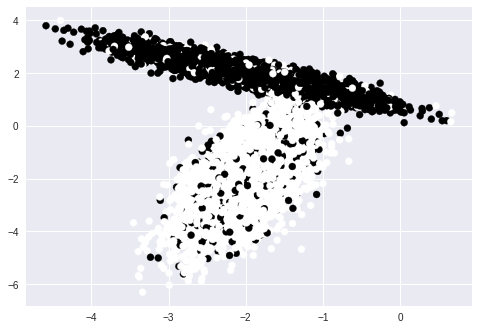

(10000, 2)
(10000,)


In [3]:
# DATASET CREATION, DATASET SPLIT

# DATA n1 ---------------------
# Generate Clean data
# X,y = make_classification(n_samples=10000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
# X_train, y_train = X,y 

# Generate noisy Data
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=17)
X_train, y_train = X,y 

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1], c=y )
plt.show()

print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X[:10])
print(y[:10])

In [4]:

# MLFromscratch Logistic Regression
logr = LogisticRegression(n_iters = 5000)
logr.fit(X_train,y_train)
preds = logr.predict(X_train)
print(preds)

# Sklearn Logistic regression
logisticRegr = SK_LogisticRegression()
logisticRegr.fit(X_train,y_train)
# logisticRegr.predict(X)
SK_dbound = - ( logisticRegr.intercept_[0] + np.delete(X_train,1, axis=1 ).dot(np.delete(logisticRegr.coef_.T, 1)) ) / logisticRegr.coef_.T[1]


[0.90596026 0.09454723 0.03261497 ... 0.85663561 0.89190409 0.24122916]


[-5.08783722  1.17009482]
[ 0.66344338 -0.31957352]


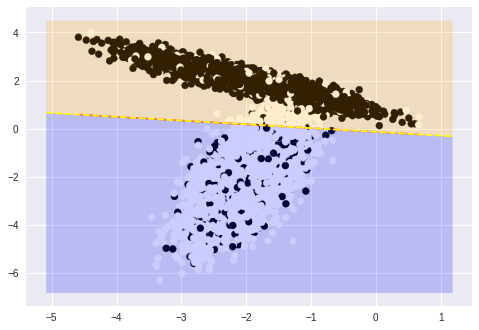

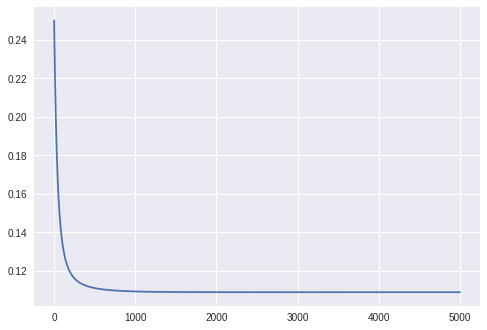

In [10]:
x_edges = np.array([X[:, 0].min()-0.5, X[:, 0].max()+0.5])
print(x_edges)

c = -logisticRegr.intercept_[0]/logisticRegr.coef_.T[1]
m = -logisticRegr.coef_.T[0]/logisticRegr.coef_.T[1]

yd = m*x_edges + c
print(yd)

ymin, ymax = X[:, 1].min()-0.5, X[:, 1].max()+0.5
plt.scatter(X[:,0],X[:,1], c=y )
# plt.plot(X_train[:,0], decision_line, '--', color="green", alpha=0.4)
plt.plot(X_train[:,0], SK_dbound, '--', color="red", alpha=0.4)
plt.plot(x_edges, yd, '--', color="yellow")

plt.fill_between(x_edges, yd, ymin, color = "blue" , alpha =0.2)
plt.fill_between(x_edges, yd, ymax, color = "orange" , alpha =0.2)

plt.show()

plt.plot(logr.costs)